# TTT4185 Machine learning for Speech technology

## Computer assigment 3a: Classification using Deep Neural Networks

This assignment assumes that the student has reviewed the material on deep neural networks.

In this assignment we will use the high level `Keras` framework together with `Tensorflow` to perform some deep learning experiments.

We will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

The first few cells of this notebook contain example code to load and extract data, setup a simple network and train a deep neural network for classification. 

Note that we do not have a test dataset, but only training and validation sets. We do some experiments on the training set and observe the effect on the validation set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras


In [3]:
# Load data from CSV files 
rawtrain = pd.read_csv("Train(2).csv")
rawvalid = pd.read_csv("Validation.csv")

# Take a peek at the raw data
rawtrain.head(10)

,SpeakerID,Gender,Phoneme,F1,F2,F3,F4,B1,B2,B3,B4
0,cjf0,F,h#,0.701982,2.125440,2.433528,3.530050,0.264459,0.326273,0.300301,0.410096
1,cjf0,F,q,0.340942,2.594934,2.788244,4.028250,0.282159,0.471724,0.310578,0.505835
2,cjf0,F,iy,0.487078,2.605132,3.093409,4.354061,0.174520,0.340025,0.232818,0.413965
3,cjf0,F,v,0.505536,2.034326,2.804329,4.130655,0.190478,0.307295,0.301741,0.370238
4,cjf0,F,ih,0.524527,2.055382,2.989248,4.480000,0.164466,0.312337,0.301859,0.362134
5,cjf0,F,n,0.601591,2.046562,3.251497,4.561420,0.185757,0.334235,0.316704,0.381524
6,cjf0,F,eh,0.762154,2.127740,3.212496,4.412842,0.207840,0.303633,0.285026,0.384152
7,cjf0,F,n,0.714553,1.837149,3.218620,5.001730,0.252105,0.311876,0.333318,0.432281
8,cjf0,F,q,0.619766,2.276717,3.109751,4.658425,0.231525,0.314789,0.406002,0.417538
9,cjf0,F,ix,0.463761,2.181577,2.859900,4.327639,0.170244,0.319690,0.291556,0.425367


In [4]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

In [5]:
# Features to use
#import tensorflow as tf
#from tensorflow import keras
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [6]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 17ms/step - loss: 1.0574 - accuracy: 0.5450 - val_loss: 1.0334 - val_accuracy: 0.5904
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9790 - accuracy: 0.6421 - val_loss: 0.9773 - val_accuracy: 0.5904
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9097 - accuracy: 0.6601 - val_loss: 0.9273 - val_accuracy: 0.6015
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.8521 - accura

18/18 [==============================] - 0s 4ms/step - loss: 0.4803 - accuracy: 0.8076 - val_loss: 0.5971 - val_accuracy: 0.7417
Epoch 55/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4784 - accuracy: 0.8076 - val_loss: 0.5974 - val_accuracy: 0.7380
Epoch 56/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4783 - accuracy: 0.8040 - val_loss: 0.5986 - val_accuracy: 0.7380
Epoch 57/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.8076 - val_loss: 0.5938 - val_accuracy: 0.7454
Epoch 58/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4809 - accuracy: 0.8129 - val_loss: 0.5970 - val_accuracy: 0.7417
Epoch 59/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.8022 - val_loss: 0.5973 - val_accuracy: 0.7380
Epoch 60/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.8040 - val_loss: 0.5957 - val_accuracy: 0.7380
Epoch 61/1000

18/18 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.8147 - val_loss: 0.5936 - val_accuracy: 0.7380
Epoch 112/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.8076 - val_loss: 0.6006 - val_accuracy: 0.7417
Epoch 113/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.8147 - val_loss: 0.5947 - val_accuracy: 0.7417
Epoch 114/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.8183 - val_loss: 0.5953 - val_accuracy: 0.7380
Epoch 115/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.8040 - val_loss: 0.5948 - val_accuracy: 0.7380
Epoch 116/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.8165 - val_loss: 0.6093 - val_accuracy: 0.7417
Epoch 117/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.8165 - val_loss: 0.5884 - val_accuracy: 0.7454
Epoch 1

Epoch 168/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.8183 - val_loss: 0.6099 - val_accuracy: 0.7454
Epoch 169/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.8129 - val_loss: 0.5908 - val_accuracy: 0.7417
Epoch 170/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.8129 - val_loss: 0.5990 - val_accuracy: 0.7417
Epoch 171/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.8129 - val_loss: 0.5984 - val_accuracy: 0.7417
Epoch 172/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.8183 - val_loss: 0.5999 - val_accuracy: 0.7417
Epoch 173/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.8165 - val_loss: 0.5985 - val_accuracy: 0.7417
Epoch 174/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4621 - accuracy: 0.8183 - val_loss: 0.5981 - val_accuracy:

Epoch 225/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4588 - accuracy: 0.8165 - val_loss: 0.6015 - val_accuracy: 0.7454
Epoch 226/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4596 - accuracy: 0.8183 - val_loss: 0.6007 - val_accuracy: 0.7454
Epoch 227/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4590 - accuracy: 0.8201 - val_loss: 0.5991 - val_accuracy: 0.7417
Epoch 228/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4583 - accuracy: 0.8129 - val_loss: 0.6009 - val_accuracy: 0.7417
Epoch 229/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.8183 - val_loss: 0.5951 - val_accuracy: 0.7417
Epoch 230/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.8147 - val_loss: 0.5994 - val_accuracy: 0.7454
Epoch 231/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.8129 - val_loss: 0.5998 - val_accuracy:

Epoch 282/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.8165 - val_loss: 0.6002 - val_accuracy: 0.7454
Epoch 283/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4566 - accuracy: 0.8147 - val_loss: 0.5993 - val_accuracy: 0.7417
Epoch 284/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4563 - accuracy: 0.8147 - val_loss: 0.6069 - val_accuracy: 0.7454
Epoch 285/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4562 - accuracy: 0.8165 - val_loss: 0.5998 - val_accuracy: 0.7454
Epoch 286/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.8147 - val_loss: 0.6045 - val_accuracy: 0.7454
Epoch 287/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 0.8201 - val_loss: 0.6030 - val_accuracy: 0.7454
Epoch 288/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.8183 - val_loss: 0.6065 - val_accuracy:

Epoch 339/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.8201 - val_loss: 0.6151 - val_accuracy: 0.7380
Epoch 340/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4545 - accuracy: 0.8147 - val_loss: 0.6036 - val_accuracy: 0.7454
Epoch 341/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4564 - accuracy: 0.8165 - val_loss: 0.6036 - val_accuracy: 0.7454
Epoch 342/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.8219 - val_loss: 0.6016 - val_accuracy: 0.7454
Epoch 343/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.8183 - val_loss: 0.6111 - val_accuracy: 0.7380
Epoch 344/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.8165 - val_loss: 0.6116 - val_accuracy: 0.7380
Epoch 345/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.8183 - val_loss: 0.6051 - val_accuracy:

Epoch 396/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4525 - accuracy: 0.8165 - val_loss: 0.6103 - val_accuracy: 0.7454
Epoch 397/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.8165 - val_loss: 0.6076 - val_accuracy: 0.7454
Epoch 398/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.8165 - val_loss: 0.6064 - val_accuracy: 0.7454
Epoch 399/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.8183 - val_loss: 0.5975 - val_accuracy: 0.7491
Epoch 400/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.8183 - val_loss: 0.6052 - val_accuracy: 0.7417
Epoch 401/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8183 - val_loss: 0.6126 - val_accuracy: 0.7491
Epoch 402/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.8165 - val_loss: 0.6021 - val_accuracy:

Epoch 453/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.8183 - val_loss: 0.6050 - val_accuracy: 0.7454
Epoch 454/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.8112 - val_loss: 0.6055 - val_accuracy: 0.7454
Epoch 455/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8219 - val_loss: 0.6047 - val_accuracy: 0.7491
Epoch 456/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.8183 - val_loss: 0.6097 - val_accuracy: 0.7417
Epoch 457/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.8165 - val_loss: 0.6096 - val_accuracy: 0.7454
Epoch 458/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.8147 - val_loss: 0.6089 - val_accuracy: 0.7417
Epoch 459/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8165 - val_loss: 0.6124 - val_accuracy:

Epoch 510/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8237 - val_loss: 0.6055 - val_accuracy: 0.7491
Epoch 511/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.8147 - val_loss: 0.6087 - val_accuracy: 0.7454
Epoch 512/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.8165 - val_loss: 0.6111 - val_accuracy: 0.7454
Epoch 513/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8165 - val_loss: 0.6115 - val_accuracy: 0.7454
Epoch 514/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.8201 - val_loss: 0.6081 - val_accuracy: 0.7454
Epoch 515/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8147 - val_loss: 0.6058 - val_accuracy: 0.7491
Epoch 516/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.8237 - val_loss: 0.6124 - val_accuracy:

Epoch 567/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.8183 - val_loss: 0.6183 - val_accuracy: 0.7454
Epoch 568/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.8147 - val_loss: 0.6034 - val_accuracy: 0.7454
Epoch 569/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.8237 - val_loss: 0.6213 - val_accuracy: 0.7417
Epoch 570/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.8201 - val_loss: 0.6064 - val_accuracy: 0.7491
Epoch 571/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.8201 - val_loss: 0.6049 - val_accuracy: 0.7454
Epoch 572/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.8237 - val_loss: 0.6082 - val_accuracy: 0.7491
Epoch 573/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.8183 - val_loss: 0.6124 - val_accuracy:

Epoch 624/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8201 - val_loss: 0.6141 - val_accuracy: 0.7454
Epoch 625/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8129 - val_loss: 0.6124 - val_accuracy: 0.7454
Epoch 626/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8201 - val_loss: 0.6162 - val_accuracy: 0.7454
Epoch 627/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8129 - val_loss: 0.6054 - val_accuracy: 0.7454
Epoch 628/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.8237 - val_loss: 0.6162 - val_accuracy: 0.7454
Epoch 629/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8112 - val_loss: 0.6127 - val_accuracy: 0.7454
Epoch 630/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8219 - val_loss: 0.6228 - val_accuracy:

Epoch 681/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.8183 - val_loss: 0.6182 - val_accuracy: 0.7380
Epoch 682/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8237 - val_loss: 0.6052 - val_accuracy: 0.7491
Epoch 683/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.8183 - val_loss: 0.6124 - val_accuracy: 0.7454
Epoch 684/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8165 - val_loss: 0.6128 - val_accuracy: 0.7491
Epoch 685/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8183 - val_loss: 0.6157 - val_accuracy: 0.7491
Epoch 686/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8237 - val_loss: 0.6085 - val_accuracy: 0.7454
Epoch 687/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8201 - val_loss: 0.6127 - val_accuracy:

Epoch 738/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8183 - val_loss: 0.6082 - val_accuracy: 0.7454
Epoch 739/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8201 - val_loss: 0.6177 - val_accuracy: 0.7491
Epoch 740/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8219 - val_loss: 0.6163 - val_accuracy: 0.7454
Epoch 741/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4442 - accuracy: 0.8255 - val_loss: 0.6069 - val_accuracy: 0.7454
Epoch 742/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4468 - accuracy: 0.8237 - val_loss: 0.6130 - val_accuracy: 0.7454
Epoch 743/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.8237 - val_loss: 0.6159 - val_accuracy: 0.7454
Epoch 744/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.8147 - val_loss: 0.6106 - val_accuracy:

Epoch 795/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.8201 - val_loss: 0.6070 - val_accuracy: 0.7454
Epoch 796/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.8183 - val_loss: 0.6182 - val_accuracy: 0.7417
Epoch 797/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8255 - val_loss: 0.6141 - val_accuracy: 0.7454
Epoch 798/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8219 - val_loss: 0.6068 - val_accuracy: 0.7491
Epoch 799/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.8201 - val_loss: 0.6187 - val_accuracy: 0.7454
Epoch 800/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.8183 - val_loss: 0.6174 - val_accuracy: 0.7454
Epoch 801/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8165 - val_loss: 0.6104 - val_accuracy:

Epoch 852/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8201 - val_loss: 0.6230 - val_accuracy: 0.7380
Epoch 853/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8237 - val_loss: 0.6098 - val_accuracy: 0.7454
Epoch 854/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8237 - val_loss: 0.6127 - val_accuracy: 0.7454
Epoch 855/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8237 - val_loss: 0.6251 - val_accuracy: 0.7454
Epoch 856/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.8183 - val_loss: 0.6102 - val_accuracy: 0.7454
Epoch 857/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8237 - val_loss: 0.6106 - val_accuracy: 0.7454
Epoch 858/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8219 - val_loss: 0.6175 - val_accuracy:

Epoch 909/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8237 - val_loss: 0.6087 - val_accuracy: 0.7454
Epoch 910/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.8201 - val_loss: 0.6209 - val_accuracy: 0.7454
Epoch 911/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8183 - val_loss: 0.6160 - val_accuracy: 0.7417
Epoch 912/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8219 - val_loss: 0.6089 - val_accuracy: 0.7491
Epoch 913/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8255 - val_loss: 0.6132 - val_accuracy: 0.7491
Epoch 914/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8237 - val_loss: 0.6205 - val_accuracy: 0.7528
Epoch 915/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.8219 - val_loss: 0.6188 - val_accuracy:

Epoch 966/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8237 - val_loss: 0.6177 - val_accuracy: 0.7528
Epoch 967/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8183 - val_loss: 0.6122 - val_accuracy: 0.7454
Epoch 968/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8273 - val_loss: 0.6097 - val_accuracy: 0.7454
Epoch 969/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8237 - val_loss: 0.6210 - val_accuracy: 0.7454
Epoch 970/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.8219 - val_loss: 0.6104 - val_accuracy: 0.7454
Epoch 971/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.8201 - val_loss: 0.6165 - val_accuracy: 0.7454
Epoch 972/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.8237 - val_loss: 0.6118 - val_accuracy:

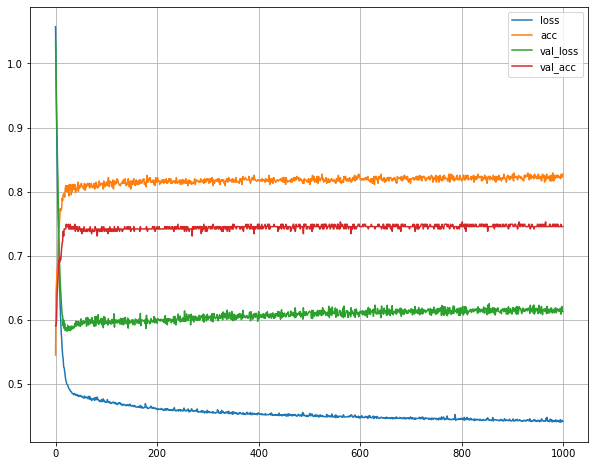

In [7]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [8]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6128561496734619
Validation accuracy: 0.7453874349594116


## Problem 1
Increase the number of features to include "F3" and "F4" and rerun the experiments. Try also adding the bandwidths ("B1"-"B4").

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 771       
Total params: 3,075
Trainable params: 3,075
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 1s 31ms/step - loss: 1.0518 - accuracy: 0.5827 - val_loss: 1.0339 - val_accuracy: 0.5277
Epoch 2/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.9732 - accuracy: 0.6115 - val_loss: 0.9900 - val_accuracy: 0.5387
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9157 - accuracy: 0.6367 - val_loss: 0.9519 - val_accuracy: 0.5572
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.8667 - acc

18/18 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8309 - val_loss: 0.5875 - val_accuracy: 0.7638
Epoch 55/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.8363 - val_loss: 0.5884 - val_accuracy: 0.7417
Epoch 56/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4291 - accuracy: 0.8399 - val_loss: 0.5897 - val_accuracy: 0.7269
Epoch 57/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4258 - accuracy: 0.8417 - val_loss: 0.6021 - val_accuracy: 0.7343
Epoch 58/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4277 - accuracy: 0.8363 - val_loss: 0.5841 - val_accuracy: 0.7491
Epoch 59/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4277 - accuracy: 0.8399 - val_loss: 0.5937 - val_accuracy: 0.7417
Epoch 60/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.8453 - val_loss: 0.5889 - val_accuracy: 0.7491
Epoch 61/1000

Epoch 168/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3535 - accuracy: 0.8651 - val_loss: 0.6006 - val_accuracy: 0.7454
Epoch 169/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.8615 - val_loss: 0.6069 - val_accuracy: 0.7417
Epoch 170/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.8633 - val_loss: 0.6009 - val_accuracy: 0.7454
Epoch 171/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3514 - accuracy: 0.8615 - val_loss: 0.5974 - val_accuracy: 0.7454
Epoch 172/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3512 - accuracy: 0.8597 - val_loss: 0.6034 - val_accuracy: 0.7380
Epoch 173/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.8651 - val_loss: 0.6017 - val_accuracy: 0.7417
Epoch 174/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.8615 - val_loss: 0.6040 - val_accuracy:

Epoch 225/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3260 - accuracy: 0.8651 - val_loss: 0.6287 - val_accuracy: 0.7528
Epoch 226/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3266 - accuracy: 0.8687 - val_loss: 0.6232 - val_accuracy: 0.7565
Epoch 227/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3244 - accuracy: 0.8741 - val_loss: 0.6299 - val_accuracy: 0.7454
Epoch 228/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3243 - accuracy: 0.8723 - val_loss: 0.6281 - val_accuracy: 0.7528
Epoch 229/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3238 - accuracy: 0.8777 - val_loss: 0.6208 - val_accuracy: 0.7565
Epoch 230/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3256 - accuracy: 0.8777 - val_loss: 0.6418 - val_accuracy: 0.7380
Epoch 231/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3275 - accuracy: 0.8669 - val_loss: 0.6245 - val_accuracy:

Epoch 282/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3046 - accuracy: 0.8723 - val_loss: 0.6615 - val_accuracy: 0.7491
Epoch 283/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3016 - accuracy: 0.8777 - val_loss: 0.6527 - val_accuracy: 0.7454
Epoch 284/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3037 - accuracy: 0.8831 - val_loss: 0.6596 - val_accuracy: 0.7565
Epoch 285/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3006 - accuracy: 0.8849 - val_loss: 0.6553 - val_accuracy: 0.7491
Epoch 286/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3004 - accuracy: 0.8831 - val_loss: 0.6618 - val_accuracy: 0.7454
Epoch 287/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3017 - accuracy: 0.8723 - val_loss: 0.6651 - val_accuracy: 0.7491
Epoch 288/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3009 - accuracy: 0.8795 - val_loss: 0.6530 - val_accuracy:

Epoch 339/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2827 - accuracy: 0.8867 - val_loss: 0.6861 - val_accuracy: 0.7417
Epoch 340/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 0.8831 - val_loss: 0.6847 - val_accuracy: 0.7565
Epoch 341/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2848 - accuracy: 0.8849 - val_loss: 0.6954 - val_accuracy: 0.7343
Epoch 342/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2825 - accuracy: 0.8849 - val_loss: 0.6890 - val_accuracy: 0.7454
Epoch 343/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2816 - accuracy: 0.8849 - val_loss: 0.6865 - val_accuracy: 0.7528
Epoch 344/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2835 - accuracy: 0.8831 - val_loss: 0.6980 - val_accuracy: 0.7380
Epoch 345/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2819 - accuracy: 0.8849 - val_loss: 0.6946 - val_accuracy:

Epoch 396/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2655 - accuracy: 0.8921 - val_loss: 0.7269 - val_accuracy: 0.7343
Epoch 397/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2661 - accuracy: 0.8921 - val_loss: 0.7200 - val_accuracy: 0.7454
Epoch 398/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2648 - accuracy: 0.8939 - val_loss: 0.7220 - val_accuracy: 0.7454
Epoch 399/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2654 - accuracy: 0.8885 - val_loss: 0.7306 - val_accuracy: 0.7343
Epoch 400/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2647 - accuracy: 0.8957 - val_loss: 0.7206 - val_accuracy: 0.7528
Epoch 401/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.2675 - accuracy: 0.8939 - val_loss: 0.7237 - val_accuracy: 0.7417
Epoch 402/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.2656 - accuracy: 0.8903 - val_loss: 0.7291 - val_accuracy:

Epoch 453/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2495 - accuracy: 0.8975 - val_loss: 0.7559 - val_accuracy: 0.7454
Epoch 454/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9029 - val_loss: 0.7517 - val_accuracy: 0.7491
Epoch 455/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2502 - accuracy: 0.8993 - val_loss: 0.7551 - val_accuracy: 0.7380
Epoch 456/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2510 - accuracy: 0.8957 - val_loss: 0.7566 - val_accuracy: 0.7343
Epoch 457/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2492 - accuracy: 0.8975 - val_loss: 0.7528 - val_accuracy: 0.7417
Epoch 458/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.9011 - val_loss: 0.7559 - val_accuracy: 0.7454
Epoch 459/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2489 - accuracy: 0.9029 - val_loss: 0.7496 - val_accuracy:

Epoch 510/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.8975 - val_loss: 0.7815 - val_accuracy: 0.7380
Epoch 511/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2379 - accuracy: 0.9029 - val_loss: 0.7824 - val_accuracy: 0.7417
Epoch 512/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2376 - accuracy: 0.9029 - val_loss: 0.7820 - val_accuracy: 0.7417
Epoch 513/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2371 - accuracy: 0.8993 - val_loss: 0.7820 - val_accuracy: 0.7380
Epoch 514/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2358 - accuracy: 0.8957 - val_loss: 0.7862 - val_accuracy: 0.7380
Epoch 515/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2369 - accuracy: 0.8993 - val_loss: 0.7858 - val_accuracy: 0.7380
Epoch 516/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2367 - accuracy: 0.8993 - val_loss: 0.7862 - val_accuracy:

Epoch 567/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.8993 - val_loss: 0.8063 - val_accuracy: 0.7380
Epoch 568/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9029 - val_loss: 0.8204 - val_accuracy: 0.7380
Epoch 569/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9083 - val_loss: 0.8057 - val_accuracy: 0.7380
Epoch 570/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2238 - accuracy: 0.8993 - val_loss: 0.8140 - val_accuracy: 0.7380
Epoch 571/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2234 - accuracy: 0.9047 - val_loss: 0.8192 - val_accuracy: 0.7380
Epoch 572/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2231 - accuracy: 0.9047 - val_loss: 0.8194 - val_accuracy: 0.7306
Epoch 573/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2254 - accuracy: 0.9029 - val_loss: 0.8098 - val_accuracy:

Epoch 624/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2125 - accuracy: 0.9101 - val_loss: 0.8357 - val_accuracy: 0.7380
Epoch 625/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2121 - accuracy: 0.9065 - val_loss: 0.8369 - val_accuracy: 0.7380
Epoch 626/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2127 - accuracy: 0.9119 - val_loss: 0.8457 - val_accuracy: 0.7380
Epoch 627/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2122 - accuracy: 0.9119 - val_loss: 0.8384 - val_accuracy: 0.7454
Epoch 628/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.9119 - val_loss: 0.8368 - val_accuracy: 0.7343
Epoch 629/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2112 - accuracy: 0.9083 - val_loss: 0.8449 - val_accuracy: 0.7417
Epoch 630/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2131 - accuracy: 0.9119 - val_loss: 0.8452 - val_accuracy:

Epoch 681/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2045 - accuracy: 0.9173 - val_loss: 0.8550 - val_accuracy: 0.7343
Epoch 682/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2013 - accuracy: 0.9209 - val_loss: 0.8689 - val_accuracy: 0.7343
Epoch 683/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1988 - accuracy: 0.9155 - val_loss: 0.8593 - val_accuracy: 0.7343
Epoch 684/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2020 - accuracy: 0.9155 - val_loss: 0.8666 - val_accuracy: 0.7343
Epoch 685/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2040 - accuracy: 0.9137 - val_loss: 0.8665 - val_accuracy: 0.7343
Epoch 686/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1994 - accuracy: 0.9245 - val_loss: 0.8623 - val_accuracy: 0.7343
Epoch 687/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2015 - accuracy: 0.9245 - val_loss: 0.8666 - val_accuracy:

Epoch 738/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1897 - accuracy: 0.9299 - val_loss: 0.8845 - val_accuracy: 0.7343
Epoch 739/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1909 - accuracy: 0.9263 - val_loss: 0.8904 - val_accuracy: 0.7306
Epoch 740/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1888 - accuracy: 0.9227 - val_loss: 0.8884 - val_accuracy: 0.7343
Epoch 741/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1903 - accuracy: 0.9227 - val_loss: 0.8889 - val_accuracy: 0.7269
Epoch 742/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1926 - accuracy: 0.9245 - val_loss: 0.8937 - val_accuracy: 0.7343
Epoch 743/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1887 - accuracy: 0.9209 - val_loss: 0.8970 - val_accuracy: 0.7380
Epoch 744/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1888 - accuracy: 0.9227 - val_loss: 0.8950 - val_accuracy:

Epoch 795/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1806 - accuracy: 0.9299 - val_loss: 0.9229 - val_accuracy: 0.7122
Epoch 796/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1799 - accuracy: 0.9371 - val_loss: 0.9183 - val_accuracy: 0.7306
Epoch 797/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1789 - accuracy: 0.9245 - val_loss: 0.9188 - val_accuracy: 0.7232
Epoch 798/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1810 - accuracy: 0.9317 - val_loss: 0.9250 - val_accuracy: 0.7269
Epoch 799/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1825 - accuracy: 0.9353 - val_loss: 0.9250 - val_accuracy: 0.7159
Epoch 800/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1794 - accuracy: 0.9371 - val_loss: 0.9186 - val_accuracy: 0.7417
Epoch 801/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1776 - accuracy: 0.9299 - val_loss: 0.9150 - val_accuracy:

Epoch 852/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1683 - accuracy: 0.9406 - val_loss: 0.9434 - val_accuracy: 0.7159
Epoch 853/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1726 - accuracy: 0.9353 - val_loss: 0.9456 - val_accuracy: 0.7232
Epoch 854/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1677 - accuracy: 0.9371 - val_loss: 0.9436 - val_accuracy: 0.7159
Epoch 855/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1709 - accuracy: 0.9371 - val_loss: 0.9441 - val_accuracy: 0.7196
Epoch 856/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1680 - accuracy: 0.9388 - val_loss: 0.9474 - val_accuracy: 0.7122
Epoch 857/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1708 - accuracy: 0.9371 - val_loss: 0.9407 - val_accuracy: 0.7122
Epoch 858/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1698 - accuracy: 0.9442 - val_loss: 0.9445 - val_accuracy:

Epoch 909/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1601 - accuracy: 0.9442 - val_loss: 0.9661 - val_accuracy: 0.7159
Epoch 910/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1566 - accuracy: 0.9496 - val_loss: 0.9663 - val_accuracy: 0.7232
Epoch 911/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1578 - accuracy: 0.9406 - val_loss: 0.9674 - val_accuracy: 0.7232
Epoch 912/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1585 - accuracy: 0.9496 - val_loss: 0.9706 - val_accuracy: 0.7232
Epoch 913/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1560 - accuracy: 0.9406 - val_loss: 0.9730 - val_accuracy: 0.7196
Epoch 914/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1565 - accuracy: 0.9460 - val_loss: 0.9725 - val_accuracy: 0.7269
Epoch 915/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1595 - accuracy: 0.9478 - val_loss: 0.9736 - val_accuracy:

Epoch 966/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1471 - accuracy: 0.9514 - val_loss: 0.9958 - val_accuracy: 0.7232
Epoch 967/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1478 - accuracy: 0.9478 - val_loss: 1.0025 - val_accuracy: 0.7269
Epoch 968/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1477 - accuracy: 0.9460 - val_loss: 0.9945 - val_accuracy: 0.7232
Epoch 969/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.9514 - val_loss: 0.9906 - val_accuracy: 0.7269
Epoch 970/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1460 - accuracy: 0.9532 - val_loss: 0.9948 - val_accuracy: 0.7306
Epoch 971/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1467 - accuracy: 0.9532 - val_loss: 1.0011 - val_accuracy: 0.7196
Epoch 972/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1494 - accuracy: 0.9532 - val_loss: 0.9943 - val_accuracy:

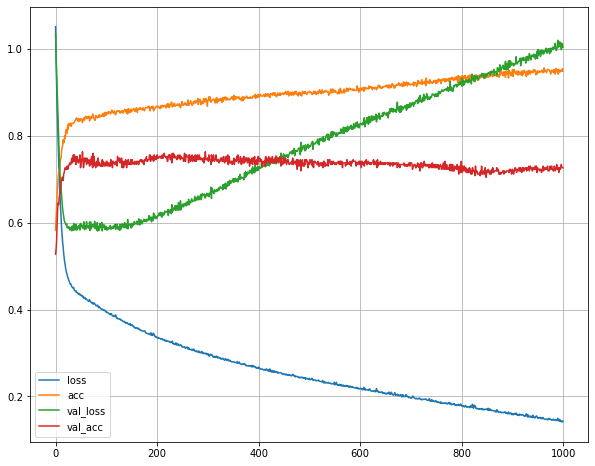

Validation loss: 1.0041899681091309
Validation accuracy: 0.7269372940063477


In [84]:
# Features to use
#import tensorflow as tf
#from tensorflow import keras
features_1 = ["F1","F2","F3","F4"]
features_2 = ["F1","F2","F3","F4","B1","B2","B3","B4"]
# Extract features
x_train_raw = train[features_2]
x_valid_raw = valid[features_2]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
#RESULTS:
#for F1-F4: 
#validation loss:  0.758630633354187
#validation accuracy: 0.7638376355171204

#for F1-B4:
#validation loss: 1.0041899681091309
#validation accuracy: 0.7269372940063477




## Problem 2
Change the number of nodes in the hidden layer and see how the results change. Try using dropout, and observe the results.

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1024)              9216      
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 3075      
Total params: 12,291
Trainable params: 12,291
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 22ms/step - loss: 1.0234 - accuracy: 0.5809 - val_loss: 0.9959 - val_accuracy: 0.5351
Epoch 2/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.9018 - accuracy: 0.6277 - val_loss: 0.9293 - val_accuracy: 0.5756
Epoch 3/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.8159 - accuracy: 0.6924 - val_loss: 0.8469 - val_accuracy: 0.6347
Epoch 4/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.7465 - a

18/18 [==============================] - 0s 3ms/step - loss: 0.3892 - accuracy: 0.8579 - val_loss: 0.5837 - val_accuracy: 0.7417
Epoch 55/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8489 - val_loss: 0.5829 - val_accuracy: 0.7417
Epoch 56/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8543 - val_loss: 0.5989 - val_accuracy: 0.7380
Epoch 57/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3885 - accuracy: 0.8471 - val_loss: 0.5889 - val_accuracy: 0.7380
Epoch 58/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3866 - accuracy: 0.8579 - val_loss: 0.5755 - val_accuracy: 0.7454
Epoch 59/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3864 - accuracy: 0.8525 - val_loss: 0.5922 - val_accuracy: 0.7269
Epoch 60/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3856 - accuracy: 0.8597 - val_loss: 0.5825 - val_accuracy: 0.7454
Epoch 61/1000

Epoch 168/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2869 - accuracy: 0.8867 - val_loss: 0.6581 - val_accuracy: 0.7565
Epoch 169/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2799 - accuracy: 0.8831 - val_loss: 0.6735 - val_accuracy: 0.7491
Epoch 170/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2830 - accuracy: 0.8831 - val_loss: 0.6667 - val_accuracy: 0.7454
Epoch 171/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2828 - accuracy: 0.8795 - val_loss: 0.6859 - val_accuracy: 0.7491
Epoch 172/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2815 - accuracy: 0.8813 - val_loss: 0.6629 - val_accuracy: 0.7565
Epoch 173/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2844 - accuracy: 0.8741 - val_loss: 0.6686 - val_accuracy: 0.7601
Epoch 174/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2829 - accuracy: 0.8885 - val_loss: 0.6817 - val_accuracy:

Epoch 225/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2434 - accuracy: 0.9029 - val_loss: 0.7271 - val_accuracy: 0.7565
Epoch 226/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2470 - accuracy: 0.8993 - val_loss: 0.7298 - val_accuracy: 0.7380
Epoch 227/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2449 - accuracy: 0.8993 - val_loss: 0.7448 - val_accuracy: 0.7417
Epoch 228/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.2442 - accuracy: 0.8957 - val_loss: 0.7228 - val_accuracy: 0.7712
Epoch 229/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.2464 - accuracy: 0.8975 - val_loss: 0.7255 - val_accuracy: 0.7454
Epoch 230/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2452 - accuracy: 0.8993 - val_loss: 0.7337 - val_accuracy: 0.7491
Epoch 231/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.2483 - accuracy: 0.8975 - val_loss: 0.7611 - val_accuracy:

Epoch 282/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2150 - accuracy: 0.9137 - val_loss: 0.8074 - val_accuracy: 0.7306
Epoch 283/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2174 - accuracy: 0.9065 - val_loss: 0.8096 - val_accuracy: 0.7306
Epoch 284/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2142 - accuracy: 0.9083 - val_loss: 0.8004 - val_accuracy: 0.7343
Epoch 285/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2139 - accuracy: 0.9083 - val_loss: 0.8097 - val_accuracy: 0.7380
Epoch 286/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2128 - accuracy: 0.9137 - val_loss: 0.7990 - val_accuracy: 0.7343
Epoch 287/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2213 - accuracy: 0.9101 - val_loss: 0.8318 - val_accuracy: 0.7528
Epoch 288/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.2148 - accuracy: 0.9209 - val_loss: 0.8023 - val_accuracy:

Epoch 339/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1889 - accuracy: 0.9245 - val_loss: 0.8674 - val_accuracy: 0.7196
Epoch 340/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1876 - accuracy: 0.9209 - val_loss: 0.8818 - val_accuracy: 0.7380
Epoch 341/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1914 - accuracy: 0.9317 - val_loss: 0.8757 - val_accuracy: 0.7232
Epoch 342/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1894 - accuracy: 0.9119 - val_loss: 0.8789 - val_accuracy: 0.7343
Epoch 343/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1881 - accuracy: 0.9245 - val_loss: 0.8717 - val_accuracy: 0.7343
Epoch 344/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1889 - accuracy: 0.9299 - val_loss: 0.8829 - val_accuracy: 0.7232
Epoch 345/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1931 - accuracy: 0.9227 - val_loss: 0.8729 - val_accuracy:

Epoch 396/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1651 - accuracy: 0.9335 - val_loss: 0.9495 - val_accuracy: 0.7269
Epoch 397/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1686 - accuracy: 0.9335 - val_loss: 0.9575 - val_accuracy: 0.7343
Epoch 398/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1693 - accuracy: 0.9353 - val_loss: 0.9365 - val_accuracy: 0.7159
Epoch 399/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1641 - accuracy: 0.9353 - val_loss: 0.9368 - val_accuracy: 0.7269
Epoch 400/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1659 - accuracy: 0.9335 - val_loss: 0.9657 - val_accuracy: 0.7380
Epoch 401/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1646 - accuracy: 0.9371 - val_loss: 0.9449 - val_accuracy: 0.7269
Epoch 402/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1622 - accuracy: 0.9406 - val_loss: 0.9524 - val_accuracy:

Epoch 453/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1486 - accuracy: 0.9496 - val_loss: 1.0137 - val_accuracy: 0.7343
Epoch 454/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1459 - accuracy: 0.9424 - val_loss: 0.9989 - val_accuracy: 0.7122
Epoch 455/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1455 - accuracy: 0.9442 - val_loss: 1.0255 - val_accuracy: 0.7269
Epoch 456/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1440 - accuracy: 0.9496 - val_loss: 1.0051 - val_accuracy: 0.7196
Epoch 457/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1430 - accuracy: 0.9496 - val_loss: 1.0217 - val_accuracy: 0.7343
Epoch 458/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1460 - accuracy: 0.9460 - val_loss: 1.0110 - val_accuracy: 0.7159
Epoch 459/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1453 - accuracy: 0.9424 - val_loss: 1.0174 - val_accuracy:

Epoch 510/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1294 - accuracy: 0.9622 - val_loss: 1.0811 - val_accuracy: 0.7122
Epoch 511/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1263 - accuracy: 0.9586 - val_loss: 1.0952 - val_accuracy: 0.7122
Epoch 512/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1283 - accuracy: 0.9586 - val_loss: 1.0840 - val_accuracy: 0.7122
Epoch 513/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.1228 - accuracy: 0.9694 - val_loss: 1.0700 - val_accuracy: 0.7122
Epoch 514/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1265 - accuracy: 0.9568 - val_loss: 1.0867 - val_accuracy: 0.7159
Epoch 515/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1271 - accuracy: 0.9568 - val_loss: 1.1130 - val_accuracy: 0.7232
Epoch 516/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1268 - accuracy: 0.9622 - val_loss: 1.0672 - val_accuracy:

Epoch 567/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1221 - accuracy: 0.9676 - val_loss: 1.1235 - val_accuracy: 0.7159
Epoch 568/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.1090 - accuracy: 0.9712 - val_loss: 1.1592 - val_accuracy: 0.7159
Epoch 569/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.1085 - accuracy: 0.9676 - val_loss: 1.1416 - val_accuracy: 0.7159
Epoch 570/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1107 - accuracy: 0.9694 - val_loss: 1.1410 - val_accuracy: 0.7122
Epoch 571/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1059 - accuracy: 0.9784 - val_loss: 1.1570 - val_accuracy: 0.7085
Epoch 572/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1113 - accuracy: 0.9676 - val_loss: 1.1555 - val_accuracy: 0.7159
Epoch 573/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1098 - accuracy: 0.9694 - val_loss: 1.1436 - val_accuracy:

Epoch 624/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0955 - accuracy: 0.9784 - val_loss: 1.2218 - val_accuracy: 0.7085
Epoch 625/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0955 - accuracy: 0.9730 - val_loss: 1.1959 - val_accuracy: 0.7232
Epoch 626/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0962 - accuracy: 0.9730 - val_loss: 1.2432 - val_accuracy: 0.7048
Epoch 627/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0952 - accuracy: 0.9712 - val_loss: 1.2326 - val_accuracy: 0.7085
Epoch 628/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0950 - accuracy: 0.9802 - val_loss: 1.2085 - val_accuracy: 0.7232
Epoch 629/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0944 - accuracy: 0.9784 - val_loss: 1.2178 - val_accuracy: 0.7159
Epoch 630/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0934 - accuracy: 0.9730 - val_loss: 1.2098 - val_accuracy:

Epoch 681/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0813 - accuracy: 0.9820 - val_loss: 1.2869 - val_accuracy: 0.7122
Epoch 682/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0819 - accuracy: 0.9838 - val_loss: 1.2953 - val_accuracy: 0.7159
Epoch 683/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0796 - accuracy: 0.9874 - val_loss: 1.3192 - val_accuracy: 0.6974
Epoch 684/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0835 - accuracy: 0.9802 - val_loss: 1.2905 - val_accuracy: 0.7159
Epoch 685/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.9838 - val_loss: 1.3381 - val_accuracy: 0.6900
Epoch 686/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0788 - accuracy: 0.9856 - val_loss: 1.2700 - val_accuracy: 0.7196
Epoch 687/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0783 - accuracy: 0.9856 - val_loss: 1.3283 - val_accuracy:

Epoch 738/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9910 - val_loss: 1.3794 - val_accuracy: 0.7085
Epoch 739/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9892 - val_loss: 1.3876 - val_accuracy: 0.7196
Epoch 740/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0680 - accuracy: 0.9892 - val_loss: 1.3806 - val_accuracy: 0.7159
Epoch 741/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0718 - accuracy: 0.9928 - val_loss: 1.3956 - val_accuracy: 0.7122
Epoch 742/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9820 - val_loss: 1.3684 - val_accuracy: 0.7269
Epoch 743/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0687 - accuracy: 0.9874 - val_loss: 1.3992 - val_accuracy: 0.7085
Epoch 744/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.9892 - val_loss: 1.3817 - val_accuracy:

Epoch 795/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0566 - accuracy: 0.9964 - val_loss: 1.4883 - val_accuracy: 0.7011
Epoch 796/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0575 - accuracy: 0.9892 - val_loss: 1.4842 - val_accuracy: 0.7085
Epoch 797/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0588 - accuracy: 0.9892 - val_loss: 1.4915 - val_accuracy: 0.7085
Epoch 798/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9892 - val_loss: 1.4849 - val_accuracy: 0.7011
Epoch 799/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.9892 - val_loss: 1.5002 - val_accuracy: 0.7048
Epoch 800/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9892 - val_loss: 1.5208 - val_accuracy: 0.7048
Epoch 801/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0620 - accuracy: 0.9856 - val_loss: 1.4605 - val_accuracy:

Epoch 852/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9910 - val_loss: 1.5887 - val_accuracy: 0.7085
Epoch 853/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0506 - accuracy: 0.9946 - val_loss: 1.5972 - val_accuracy: 0.7011
Epoch 854/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0477 - accuracy: 0.9982 - val_loss: 1.5835 - val_accuracy: 0.7122
Epoch 855/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0494 - accuracy: 0.9928 - val_loss: 1.5707 - val_accuracy: 0.7196
Epoch 856/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9928 - val_loss: 1.5742 - val_accuracy: 0.7048
Epoch 857/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0483 - accuracy: 0.9928 - val_loss: 1.5585 - val_accuracy: 0.7159
Epoch 858/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0523 - accuracy: 0.9928 - val_loss: 1.5837 - val_accuracy:

Epoch 909/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9982 - val_loss: 1.6837 - val_accuracy: 0.6974
Epoch 910/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0404 - accuracy: 0.9982 - val_loss: 1.6738 - val_accuracy: 0.7011
Epoch 911/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0400 - accuracy: 0.9982 - val_loss: 1.6579 - val_accuracy: 0.7122
Epoch 912/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0395 - accuracy: 0.9982 - val_loss: 1.7362 - val_accuracy: 0.6974
Epoch 913/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0407 - accuracy: 1.0000 - val_loss: 1.6775 - val_accuracy: 0.6974
Epoch 914/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0423 - accuracy: 0.9964 - val_loss: 1.6584 - val_accuracy: 0.7232
Epoch 915/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0397 - accuracy: 0.9946 - val_loss: 1.6869 - val_accuracy:

Epoch 966/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9982 - val_loss: 1.7466 - val_accuracy: 0.7159
Epoch 967/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9964 - val_loss: 1.8489 - val_accuracy: 0.7011
Epoch 968/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9892 - val_loss: 1.8000 - val_accuracy: 0.7048
Epoch 969/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.9982 - val_loss: 1.7551 - val_accuracy: 0.7085
Epoch 970/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9982 - val_loss: 1.8163 - val_accuracy: 0.7048
Epoch 971/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 1.7985 - val_accuracy: 0.7011
Epoch 972/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 1.0000 - val_loss: 1.8333 - val_accuracy:

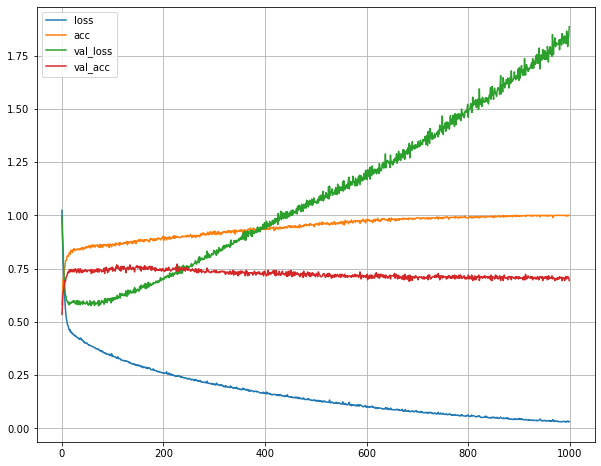

Validation loss: 1.8857614994049072
Validation accuracy: 0.6937269568443298


In [86]:
# Create a model with a N hidden layers
N=4
model = keras.Sequential([
    keras.layers.Dense(256*N, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

#RESULTS:
#for N=2:
#Validation loss: 1.2127856016159058
#Validation accuracy: 0.7121770977973938
#for N=4:


## Problem 3
Add multiple layers to the network and observe the results.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               768       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 771       
Total params: 133,123
Trainable params: 133,123
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.9713 - accuracy: 0.6169 - val_loss: 0.8257 - val_accuracy: 0.6568
Epoch 2/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6677 - accuracy: 0.7068 - v

18/18 [==============================] - 0s 4ms/step - loss: 0.4467 - accuracy: 0.8183 - val_loss: 0.5950 - val_accuracy: 0.7638
Epoch 53/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4501 - accuracy: 0.8129 - val_loss: 0.6056 - val_accuracy: 0.7491
Epoch 54/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.8165 - val_loss: 0.6245 - val_accuracy: 0.7454
Epoch 55/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4413 - accuracy: 0.8255 - val_loss: 0.6219 - val_accuracy: 0.7601
Epoch 56/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4509 - accuracy: 0.8183 - val_loss: 0.6040 - val_accuracy: 0.7565
Epoch 57/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4406 - accuracy: 0.8183 - val_loss: 0.6248 - val_accuracy: 0.7380
Epoch 58/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.8183 - val_loss: 0.5995 - val_accuracy: 0.7491
Epoch 59/1000

18/18 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.8183 - val_loss: 0.6430 - val_accuracy: 0.7380
Epoch 110/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.8363 - val_loss: 0.6262 - val_accuracy: 0.7601
Epoch 111/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.8345 - val_loss: 0.6305 - val_accuracy: 0.7454
Epoch 112/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4256 - accuracy: 0.8309 - val_loss: 0.6419 - val_accuracy: 0.7380
Epoch 113/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4227 - accuracy: 0.8309 - val_loss: 0.6172 - val_accuracy: 0.7638
Epoch 114/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.8201 - val_loss: 0.6513 - val_accuracy: 0.7454
Epoch 115/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8076 - val_loss: 0.6520 - val_accuracy: 0.7528
Epoch 1

Epoch 166/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.8327 - val_loss: 0.6624 - val_accuracy: 0.7306
Epoch 167/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8327 - val_loss: 0.6429 - val_accuracy: 0.7528
Epoch 168/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8291 - val_loss: 0.6671 - val_accuracy: 0.7565
Epoch 169/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4096 - accuracy: 0.8363 - val_loss: 0.6851 - val_accuracy: 0.7343
Epoch 170/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8237 - val_loss: 0.6766 - val_accuracy: 0.7528
Epoch 171/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8291 - val_loss: 0.6449 - val_accuracy: 0.7417
Epoch 172/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.8165 - val_loss: 0.6759 - val_accuracy:

Epoch 223/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4000 - accuracy: 0.8273 - val_loss: 0.7313 - val_accuracy: 0.7786
Epoch 224/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4047 - accuracy: 0.8201 - val_loss: 0.7258 - val_accuracy: 0.7786
Epoch 225/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3811 - accuracy: 0.8507 - val_loss: 0.7356 - val_accuracy: 0.7417
Epoch 226/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3874 - accuracy: 0.8363 - val_loss: 0.7396 - val_accuracy: 0.7491
Epoch 227/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3919 - accuracy: 0.8471 - val_loss: 0.7538 - val_accuracy: 0.7491
Epoch 228/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3929 - accuracy: 0.8471 - val_loss: 0.7411 - val_accuracy: 0.7601
Epoch 229/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.8381 - val_loss: 0.7404 - val_accuracy:

Epoch 280/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8381 - val_loss: 0.8233 - val_accuracy: 0.7601
Epoch 281/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3825 - accuracy: 0.8363 - val_loss: 0.8536 - val_accuracy: 0.7528
Epoch 282/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3766 - accuracy: 0.8471 - val_loss: 0.8014 - val_accuracy: 0.7712
Epoch 283/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3719 - accuracy: 0.8471 - val_loss: 0.8269 - val_accuracy: 0.7417
Epoch 284/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3666 - accuracy: 0.8561 - val_loss: 0.8511 - val_accuracy: 0.7306
Epoch 285/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3646 - accuracy: 0.8507 - val_loss: 0.8449 - val_accuracy: 0.7306
Epoch 286/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3682 - accuracy: 0.8543 - val_loss: 0.8495 - val_accuracy:

Epoch 337/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8543 - val_loss: 0.9204 - val_accuracy: 0.7269
Epoch 338/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8561 - val_loss: 0.9624 - val_accuracy: 0.7232
Epoch 339/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3577 - accuracy: 0.8525 - val_loss: 0.9124 - val_accuracy: 0.7528
Epoch 340/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3553 - accuracy: 0.8525 - val_loss: 0.9200 - val_accuracy: 0.7454
Epoch 341/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3563 - accuracy: 0.8327 - val_loss: 0.9256 - val_accuracy: 0.7528
Epoch 342/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3551 - accuracy: 0.8543 - val_loss: 1.0385 - val_accuracy: 0.7232
Epoch 343/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8471 - val_loss: 0.9349 - val_accuracy:

Epoch 394/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3439 - accuracy: 0.8597 - val_loss: 1.0784 - val_accuracy: 0.7196
Epoch 395/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3300 - accuracy: 0.8615 - val_loss: 1.0516 - val_accuracy: 0.7343
Epoch 396/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.8597 - val_loss: 1.0333 - val_accuracy: 0.7159
Epoch 397/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3362 - accuracy: 0.8507 - val_loss: 0.9921 - val_accuracy: 0.7269
Epoch 398/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3328 - accuracy: 0.8687 - val_loss: 1.0648 - val_accuracy: 0.7491
Epoch 399/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3251 - accuracy: 0.8633 - val_loss: 1.0874 - val_accuracy: 0.7122
Epoch 400/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3246 - accuracy: 0.8561 - val_loss: 1.0531 - val_accuracy:

Epoch 451/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3278 - accuracy: 0.8615 - val_loss: 1.1569 - val_accuracy: 0.7306
Epoch 452/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3213 - accuracy: 0.8561 - val_loss: 1.1396 - val_accuracy: 0.7122
Epoch 453/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.8741 - val_loss: 1.1875 - val_accuracy: 0.7196
Epoch 454/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3038 - accuracy: 0.8759 - val_loss: 1.1873 - val_accuracy: 0.7232
Epoch 455/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2999 - accuracy: 0.8705 - val_loss: 1.1400 - val_accuracy: 0.7196
Epoch 456/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3123 - accuracy: 0.8633 - val_loss: 1.2306 - val_accuracy: 0.7159
Epoch 457/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3022 - accuracy: 0.8741 - val_loss: 1.1471 - val_accuracy:

Epoch 508/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2902 - accuracy: 0.8867 - val_loss: 1.3156 - val_accuracy: 0.7232
Epoch 509/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2956 - accuracy: 0.8705 - val_loss: 1.3447 - val_accuracy: 0.7306
Epoch 510/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3009 - accuracy: 0.8741 - val_loss: 1.2809 - val_accuracy: 0.7122
Epoch 511/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2960 - accuracy: 0.8633 - val_loss: 1.3703 - val_accuracy: 0.7232
Epoch 512/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2865 - accuracy: 0.8759 - val_loss: 1.3303 - val_accuracy: 0.6974
Epoch 513/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2905 - accuracy: 0.8669 - val_loss: 1.3268 - val_accuracy: 0.7269
Epoch 514/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2784 - accuracy: 0.8795 - val_loss: 1.3708 - val_accuracy:

Epoch 565/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3055 - accuracy: 0.8507 - val_loss: 1.4672 - val_accuracy: 0.7269
Epoch 566/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2758 - accuracy: 0.8759 - val_loss: 1.4459 - val_accuracy: 0.7011
Epoch 567/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2743 - accuracy: 0.8687 - val_loss: 1.5556 - val_accuracy: 0.7306
Epoch 568/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2845 - accuracy: 0.8687 - val_loss: 1.4169 - val_accuracy: 0.7011
Epoch 569/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2774 - accuracy: 0.8723 - val_loss: 1.5054 - val_accuracy: 0.7196
Epoch 570/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2604 - accuracy: 0.8741 - val_loss: 1.4541 - val_accuracy: 0.7122
Epoch 571/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2591 - accuracy: 0.8975 - val_loss: 1.5759 - val_accuracy:

Epoch 622/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2364 - accuracy: 0.8939 - val_loss: 1.6064 - val_accuracy: 0.7011
Epoch 623/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2571 - accuracy: 0.8885 - val_loss: 1.6346 - val_accuracy: 0.7011
Epoch 624/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.8849 - val_loss: 1.6000 - val_accuracy: 0.7269
Epoch 625/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.8903 - val_loss: 1.7273 - val_accuracy: 0.7048
Epoch 626/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.8903 - val_loss: 1.6874 - val_accuracy: 0.7048
Epoch 627/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.8957 - val_loss: 1.8251 - val_accuracy: 0.7232
Epoch 628/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 0.8777 - val_loss: 1.6559 - val_accuracy:

Epoch 679/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2660 - accuracy: 0.8831 - val_loss: 1.7782 - val_accuracy: 0.7048
Epoch 680/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2418 - accuracy: 0.8993 - val_loss: 1.7664 - val_accuracy: 0.6863
Epoch 681/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2382 - accuracy: 0.8957 - val_loss: 1.7700 - val_accuracy: 0.7232
Epoch 682/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2384 - accuracy: 0.8957 - val_loss: 1.8312 - val_accuracy: 0.7085
Epoch 683/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2312 - accuracy: 0.8975 - val_loss: 1.8107 - val_accuracy: 0.7122
Epoch 684/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2303 - accuracy: 0.8993 - val_loss: 1.8076 - val_accuracy: 0.7011
Epoch 685/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2421 - accuracy: 0.8849 - val_loss: 1.7337 - val_accuracy:

Epoch 736/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2025 - accuracy: 0.9173 - val_loss: 1.9323 - val_accuracy: 0.7196
Epoch 737/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.9065 - val_loss: 1.9563 - val_accuracy: 0.7048
Epoch 738/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2140 - accuracy: 0.9083 - val_loss: 2.0325 - val_accuracy: 0.7085
Epoch 739/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9119 - val_loss: 1.9675 - val_accuracy: 0.7085
Epoch 740/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9155 - val_loss: 2.0300 - val_accuracy: 0.6974
Epoch 741/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2165 - accuracy: 0.9137 - val_loss: 1.9558 - val_accuracy: 0.7122
Epoch 742/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2207 - accuracy: 0.8993 - val_loss: 2.0017 - val_accuracy:

Epoch 793/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1885 - accuracy: 0.9227 - val_loss: 2.1952 - val_accuracy: 0.7122
Epoch 794/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1873 - accuracy: 0.9191 - val_loss: 2.1844 - val_accuracy: 0.7196
Epoch 795/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2012 - accuracy: 0.9137 - val_loss: 2.2784 - val_accuracy: 0.7159
Epoch 796/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.9083 - val_loss: 2.2584 - val_accuracy: 0.7085
Epoch 797/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1947 - accuracy: 0.9209 - val_loss: 2.2001 - val_accuracy: 0.7232
Epoch 798/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9227 - val_loss: 2.1687 - val_accuracy: 0.7122
Epoch 799/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1844 - accuracy: 0.9155 - val_loss: 2.2050 - val_accuracy:

Epoch 850/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1869 - accuracy: 0.9155 - val_loss: 2.2731 - val_accuracy: 0.7011
Epoch 851/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1747 - accuracy: 0.9245 - val_loss: 2.4652 - val_accuracy: 0.7048
Epoch 852/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1781 - accuracy: 0.9245 - val_loss: 2.4303 - val_accuracy: 0.7085
Epoch 853/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1831 - accuracy: 0.9263 - val_loss: 2.3357 - val_accuracy: 0.7011
Epoch 854/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1624 - accuracy: 0.9209 - val_loss: 2.3114 - val_accuracy: 0.7011
Epoch 855/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1661 - accuracy: 0.9317 - val_loss: 2.3781 - val_accuracy: 0.7196
Epoch 856/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1851 - accuracy: 0.9245 - val_loss: 2.3264 - val_accuracy:

Epoch 907/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1596 - accuracy: 0.9335 - val_loss: 2.5509 - val_accuracy: 0.6974
Epoch 908/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1699 - accuracy: 0.9335 - val_loss: 2.5488 - val_accuracy: 0.7085
Epoch 909/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1803 - accuracy: 0.9317 - val_loss: 2.5698 - val_accuracy: 0.7048
Epoch 910/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1801 - accuracy: 0.9263 - val_loss: 2.5453 - val_accuracy: 0.6974
Epoch 911/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.9209 - val_loss: 2.4909 - val_accuracy: 0.7159
Epoch 912/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1998 - accuracy: 0.9155 - val_loss: 2.4576 - val_accuracy: 0.7048
Epoch 913/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1792 - accuracy: 0.9245 - val_loss: 2.3912 - val_accuracy:

Epoch 964/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1839 - accuracy: 0.9191 - val_loss: 2.5795 - val_accuracy: 0.6827
Epoch 965/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1552 - accuracy: 0.9281 - val_loss: 2.7598 - val_accuracy: 0.7085
Epoch 966/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1523 - accuracy: 0.9442 - val_loss: 2.8952 - val_accuracy: 0.7196
Epoch 967/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1902 - accuracy: 0.9191 - val_loss: 2.6976 - val_accuracy: 0.6937
Epoch 968/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9245 - val_loss: 2.6245 - val_accuracy: 0.7048
Epoch 969/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1677 - accuracy: 0.9263 - val_loss: 2.7765 - val_accuracy: 0.6974
Epoch 970/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1881 - accuracy: 0.9155 - val_loss: 2.8904 - val_accuracy:

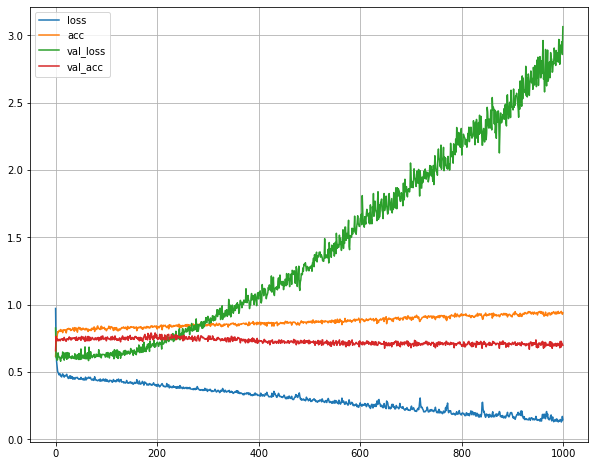

Validation loss: 3.064047336578369
Validation accuracy: 0.6974169611930847


In [9]:
# Create a model with a N hidden layers
N=1
model = keras.Sequential([
    keras.layers.Dense(256*N, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(256*N, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(256*N, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

#increasing layers:
#Validation loss: 3.064047336578369
#Validation accuracy: 0.6974169611930847


## Problem 4
Use the data to predict the gender of the speaker. Try including the format bandwidths as features as well ("B1"-"B4").

In [22]:
# We will be classifying the gender. Extract the training and validation data
gender = ["F","M"]
train = rawtrain[rawtrain["Gender"].isin(gender)]
valid = rawvalid[rawvalid["Gender"].isin(gender)]
trainlabels = [gender.index(ph) for ph in train["Gender"]]
validlabels = [gender.index(ph) for ph in valid["Gender"]]

# Features to use
#import tensorflow as tf
#from tensorflow import keras
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(gender))
y_valid = keras.utils.to_categorical(validlabels, len(gender))


# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(gender), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)




Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               768       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 514       
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5705 - accuracy: 0.7127 - val_loss: 0.6096 - val_accuracy: 0.6795
Epoch 2/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.7202 - val_loss: 0.6071 - val_accuracy: 0.6788
Epoch 3/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5527 - accuracy: 0.7227 - val_loss: 0.6219 - val_accuracy: 0.6684
Epoch 4/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5522

394/394 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7242 - val_loss: 0.6041 - val_accuracy: 0.6911
Epoch 54/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5475 - accuracy: 0.7249 - val_loss: 0.6106 - val_accuracy: 0.6883
Epoch 55/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7267 - val_loss: 0.6165 - val_accuracy: 0.6848
Epoch 56/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5474 - accuracy: 0.7255 - val_loss: 0.6205 - val_accuracy: 0.6751
Epoch 57/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7247 - val_loss: 0.6051 - val_accuracy: 0.6893
Epoch 58/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5471 - accuracy: 0.7253 - val_loss: 0.6101 - val_accuracy: 0.6869
Epoch 59/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5475 - accuracy: 0.7271 - val_loss: 0.6236 - val_accuracy: 0.6786

394/394 [==============================] - 1s 2ms/step - loss: 0.5459 - accuracy: 0.7262 - val_loss: 0.6228 - val_accuracy: 0.6848
Epoch 110/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5462 - accuracy: 0.7253 - val_loss: 0.6347 - val_accuracy: 0.6778
Epoch 111/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5462 - accuracy: 0.7253 - val_loss: 0.6260 - val_accuracy: 0.6705
Epoch 112/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5465 - accuracy: 0.7268 - val_loss: 0.6254 - val_accuracy: 0.6781
Epoch 113/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5460 - accuracy: 0.7256 - val_loss: 0.6191 - val_accuracy: 0.6851
Epoch 114/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5461 - accuracy: 0.7260 - val_loss: 0.6149 - val_accuracy: 0.6846
Epoch 115/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5462 - accuracy: 0.7284 - val_loss: 0.6140 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.5455 - accuracy: 0.7257 - val_loss: 0.6152 - val_accuracy: 0.6883
Epoch 166/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5454 - accuracy: 0.7262 - val_loss: 0.6089 - val_accuracy: 0.6848
Epoch 167/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5457 - accuracy: 0.7251 - val_loss: 0.6158 - val_accuracy: 0.6856
Epoch 168/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5455 - accuracy: 0.7263 - val_loss: 0.6269 - val_accuracy: 0.6796
Epoch 169/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5454 - accuracy: 0.7278 - val_loss: 0.6209 - val_accuracy: 0.6820
Epoch 170/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.7259 - val_loss: 0.6213 - val_accuracy: 0.6790
Epoch 171/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5454 - accuracy: 0.7262 - val_loss: 0.6198 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.5452 - accuracy: 0.7268 - val_loss: 0.6162 - val_accuracy: 0.6795
Epoch 222/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5449 - accuracy: 0.7247 - val_loss: 0.6232 - val_accuracy: 0.6758
Epoch 223/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5451 - accuracy: 0.7267 - val_loss: 0.6162 - val_accuracy: 0.6863
Epoch 224/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5452 - accuracy: 0.7273 - val_loss: 0.6155 - val_accuracy: 0.6858
Epoch 225/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5449 - accuracy: 0.7281 - val_loss: 0.6057 - val_accuracy: 0.6905
Epoch 226/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5450 - accuracy: 0.7254 - val_loss: 0.6034 - val_accuracy: 0.6894
Epoch 227/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5451 - accuracy: 0.7265 - val_loss: 0.6136 - val_accuracy: 

394/394 [==============================] - 2s 6ms/step - loss: 0.5449 - accuracy: 0.7266 - val_loss: 0.6099 - val_accuracy: 0.6863
Epoch 278/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5450 - accuracy: 0.7261 - val_loss: 0.6208 - val_accuracy: 0.6835
Epoch 279/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5451 - accuracy: 0.7279 - val_loss: 0.6147 - val_accuracy: 0.6853
Epoch 280/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5445 - accuracy: 0.7260 - val_loss: 0.6166 - val_accuracy: 0.6848
Epoch 281/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5446 - accuracy: 0.7258 - val_loss: 0.6161 - val_accuracy: 0.6831
Epoch 282/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5448 - accuracy: 0.7269 - val_loss: 0.6204 - val_accuracy: 0.6832
Epoch 283/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5448 - accuracy: 0.7268 - val_loss: 0.6148 - val_accuracy: 

394/394 [==============================] - 2s 6ms/step - loss: 0.5444 - accuracy: 0.7269 - val_loss: 0.6117 - val_accuracy: 0.6884
Epoch 334/1000
394/394 [==============================] - 3s 6ms/step - loss: 0.5445 - accuracy: 0.7274 - val_loss: 0.6174 - val_accuracy: 0.6862
Epoch 335/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5444 - accuracy: 0.7261 - val_loss: 0.6093 - val_accuracy: 0.6887
Epoch 336/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5444 - accuracy: 0.7262 - val_loss: 0.6147 - val_accuracy: 0.6828
Epoch 337/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5443 - accuracy: 0.7269 - val_loss: 0.6243 - val_accuracy: 0.6797
Epoch 338/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5443 - accuracy: 0.7281 - val_loss: 0.6249 - val_accuracy: 0.6820
Epoch 339/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5448 - accuracy: 0.7260 - val_loss: 0.6293 - val_accuracy: 

394/394 [==============================] - 2s 6ms/step - loss: 0.5442 - accuracy: 0.7268 - val_loss: 0.6129 - val_accuracy: 0.6865
Epoch 390/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5442 - accuracy: 0.7263 - val_loss: 0.6073 - val_accuracy: 0.6886
Epoch 391/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5440 - accuracy: 0.7257 - val_loss: 0.6277 - val_accuracy: 0.6809
Epoch 392/1000
394/394 [==============================] - 3s 7ms/step - loss: 0.5443 - accuracy: 0.7266 - val_loss: 0.6131 - val_accuracy: 0.6907
Epoch 393/1000
394/394 [==============================] - 3s 7ms/step - loss: 0.5442 - accuracy: 0.7271 - val_loss: 0.6193 - val_accuracy: 0.6816
Epoch 394/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5445 - accuracy: 0.7268 - val_loss: 0.6151 - val_accuracy: 0.6851
Epoch 395/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5439 - accuracy: 0.7275 - val_loss: 0.6082 - val_accuracy: 

394/394 [==============================] - 2s 6ms/step - loss: 0.5439 - accuracy: 0.7277 - val_loss: 0.6277 - val_accuracy: 0.6751
Epoch 446/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5441 - accuracy: 0.7269 - val_loss: 0.6167 - val_accuracy: 0.6835
Epoch 447/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5439 - accuracy: 0.7268 - val_loss: 0.6187 - val_accuracy: 0.6844
Epoch 448/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5443 - accuracy: 0.7261 - val_loss: 0.6041 - val_accuracy: 0.6919
Epoch 449/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5440 - accuracy: 0.7290 - val_loss: 0.6138 - val_accuracy: 0.6873
Epoch 450/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5444 - accuracy: 0.7265 - val_loss: 0.6145 - val_accuracy: 0.6849
Epoch 451/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5438 - accuracy: 0.7264 - val_loss: 0.6200 - val_accuracy: 

394/394 [==============================] - 2s 6ms/step - loss: 0.5437 - accuracy: 0.7285 - val_loss: 0.6163 - val_accuracy: 0.6851
Epoch 502/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5441 - accuracy: 0.7275 - val_loss: 0.6193 - val_accuracy: 0.6867
Epoch 503/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5437 - accuracy: 0.7260 - val_loss: 0.6161 - val_accuracy: 0.6860
Epoch 504/1000
394/394 [==============================] - 3s 6ms/step - loss: 0.5438 - accuracy: 0.7254 - val_loss: 0.6191 - val_accuracy: 0.6844
Epoch 505/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5438 - accuracy: 0.7271 - val_loss: 0.6236 - val_accuracy: 0.6813
Epoch 506/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5437 - accuracy: 0.7252 - val_loss: 0.6164 - val_accuracy: 0.6880
Epoch 507/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5440 - accuracy: 0.7260 - val_loss: 0.6165 - val_accuracy: 

394/394 [==============================] - 2s 6ms/step - loss: 0.5436 - accuracy: 0.7257 - val_loss: 0.6083 - val_accuracy: 0.6894
Epoch 558/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5440 - accuracy: 0.7266 - val_loss: 0.6201 - val_accuracy: 0.6828
Epoch 559/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5439 - accuracy: 0.7261 - val_loss: 0.6192 - val_accuracy: 0.6797
Epoch 560/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5440 - accuracy: 0.7273 - val_loss: 0.6151 - val_accuracy: 0.6886
Epoch 561/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5435 - accuracy: 0.7268 - val_loss: 0.6042 - val_accuracy: 0.6904
Epoch 562/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5438 - accuracy: 0.7271 - val_loss: 0.6212 - val_accuracy: 0.6848
Epoch 563/1000
394/394 [==============================] - 2s 6ms/step - loss: 0.5437 - accuracy: 0.7261 - val_loss: 0.6173 - val_accuracy: 

394/394 [==============================] - 2s 5ms/step - loss: 0.5434 - accuracy: 0.7281 - val_loss: 0.6231 - val_accuracy: 0.6785
Epoch 614/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5435 - accuracy: 0.7267 - val_loss: 0.6086 - val_accuracy: 0.6883
Epoch 615/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5437 - accuracy: 0.7264 - val_loss: 0.6136 - val_accuracy: 0.6888
Epoch 616/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5438 - accuracy: 0.7252 - val_loss: 0.6105 - val_accuracy: 0.6893
Epoch 617/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5436 - accuracy: 0.7262 - val_loss: 0.6182 - val_accuracy: 0.6879
Epoch 618/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5436 - accuracy: 0.7263 - val_loss: 0.6208 - val_accuracy: 0.6851
Epoch 619/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5435 - accuracy: 0.7266 - val_loss: 0.6241 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.5435 - accuracy: 0.7279 - val_loss: 0.6213 - val_accuracy: 0.6803
Epoch 670/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5434 - accuracy: 0.7269 - val_loss: 0.6189 - val_accuracy: 0.6820
Epoch 671/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5433 - accuracy: 0.7269 - val_loss: 0.6268 - val_accuracy: 0.6772
Epoch 672/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5434 - accuracy: 0.7264 - val_loss: 0.6099 - val_accuracy: 0.6905
Epoch 673/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5435 - accuracy: 0.7274 - val_loss: 0.6241 - val_accuracy: 0.6818
Epoch 674/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5434 - accuracy: 0.7275 - val_loss: 0.6064 - val_accuracy: 0.6905
Epoch 675/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5435 - accuracy: 0.7266 - val_loss: 0.6207 - val_accuracy: 

394/394 [==============================] - 1s 3ms/step - loss: 0.5433 - accuracy: 0.7260 - val_loss: 0.6257 - val_accuracy: 0.6825
Epoch 726/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5431 - accuracy: 0.7264 - val_loss: 0.6222 - val_accuracy: 0.6862
Epoch 727/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5437 - accuracy: 0.7277 - val_loss: 0.6185 - val_accuracy: 0.6884
Epoch 728/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5433 - accuracy: 0.7277 - val_loss: 0.6122 - val_accuracy: 0.6873
Epoch 729/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5438 - accuracy: 0.7265 - val_loss: 0.6177 - val_accuracy: 0.6842
Epoch 730/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5434 - accuracy: 0.7274 - val_loss: 0.6165 - val_accuracy: 0.6877
Epoch 731/1000
394/394 [==============================] - 1s 4ms/step - loss: 0.5432 - accuracy: 0.7265 - val_loss: 0.6187 - val_accuracy: 

394/394 [==============================] - 1s 3ms/step - loss: 0.5434 - accuracy: 0.7265 - val_loss: 0.6333 - val_accuracy: 0.6764
Epoch 782/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5433 - accuracy: 0.7263 - val_loss: 0.6214 - val_accuracy: 0.6867
Epoch 783/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5436 - accuracy: 0.7264 - val_loss: 0.6149 - val_accuracy: 0.6888
Epoch 784/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5436 - accuracy: 0.7264 - val_loss: 0.6154 - val_accuracy: 0.6859
Epoch 785/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5436 - accuracy: 0.7266 - val_loss: 0.6187 - val_accuracy: 0.6823
Epoch 786/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5434 - accuracy: 0.7267 - val_loss: 0.6174 - val_accuracy: 0.6860
Epoch 787/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5439 - accuracy: 0.7271 - val_loss: 0.6133 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.5434 - accuracy: 0.7277 - val_loss: 0.6152 - val_accuracy: 0.6883
Epoch 838/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5432 - accuracy: 0.7261 - val_loss: 0.6153 - val_accuracy: 0.6888
Epoch 839/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5430 - accuracy: 0.7260 - val_loss: 0.6138 - val_accuracy: 0.6873
Epoch 840/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5433 - accuracy: 0.7273 - val_loss: 0.6196 - val_accuracy: 0.6866
Epoch 841/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5429 - accuracy: 0.7275 - val_loss: 0.6178 - val_accuracy: 0.6837
Epoch 842/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5432 - accuracy: 0.7273 - val_loss: 0.6245 - val_accuracy: 0.6831
Epoch 843/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5431 - accuracy: 0.7266 - val_loss: 0.6275 - val_accuracy: 

394/394 [==============================] - 1s 3ms/step - loss: 0.5432 - accuracy: 0.7262 - val_loss: 0.6192 - val_accuracy: 0.6853
Epoch 894/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5433 - accuracy: 0.7273 - val_loss: 0.6182 - val_accuracy: 0.6886
Epoch 895/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5432 - accuracy: 0.7273 - val_loss: 0.6240 - val_accuracy: 0.6828
Epoch 896/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5430 - accuracy: 0.7271 - val_loss: 0.6072 - val_accuracy: 0.6912
Epoch 897/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5434 - accuracy: 0.7265 - val_loss: 0.6172 - val_accuracy: 0.6886
Epoch 898/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5429 - accuracy: 0.7269 - val_loss: 0.6338 - val_accuracy: 0.6744
Epoch 899/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.5430 - accuracy: 0.7258 - val_loss: 0.6232 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.5432 - accuracy: 0.7266 - val_loss: 0.6224 - val_accuracy: 0.6855
Epoch 950/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5431 - accuracy: 0.7260 - val_loss: 0.6196 - val_accuracy: 0.6891
Epoch 951/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5434 - accuracy: 0.7273 - val_loss: 0.6168 - val_accuracy: 0.6890
Epoch 952/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5429 - accuracy: 0.7262 - val_loss: 0.6230 - val_accuracy: 0.6851
Epoch 953/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5429 - accuracy: 0.7273 - val_loss: 0.6137 - val_accuracy: 0.6905
Epoch 954/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5434 - accuracy: 0.7269 - val_loss: 0.6179 - val_accuracy: 0.6860
Epoch 955/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5432 - accuracy: 0.7272 - val_loss: 0.6133 - val_accuracy: 